# 프로젝트: 한국어 데이터로 챗봇 만들기😄🤖

## 챗봇에 관하여
* 챗봇 : 인간의 언어를 이해하고 인간과 자연어로 대화할 수 있는 기계
* 챗봇의 종류 : 대화형 챗봇, 트리형(버튼) 챗봇, 추천형 챗봇, 시나리오형 챗봇, 이들을 결합한 결합형 챗봇이 있습니다. 진정한 챗봇의 가치는 사용자가 어떤 말을 하더라도 알아듣고 적절히 대응할 수 있는 자유도에 있기 때문에 대화형을 제외하면 한계가 명확합니다.


인간보다 정확하게 퀴즈를 풀어내는 BERT, ALBERT 등은 모두 트랜스포머(Transformer)라는 모델을 활용하여 pretrain을 적용한 것들입니다. 트랜스포머 이전에도 LSTM 등 RNN 기반의 딥러닝 모델, 그리고 이를 인코더-디코더 구조로 엮은 seq2seq 모델 등을 활용하여 챗봇 제작을 시도해 왔습니다. 그러나 2017년에 발표된 트랜스포머는 병렬처리에 불리한 LSTM에 비해 훨씬 뛰어난 처리 속도를 보이면서도 LSTM 등 RNN 모델이 가지는 장기 의존성에 강건한 특징 때문에 매우 긴 길이의 문장을 처리하는 데 유리하다는 좋은 특징을 보여주었고, 이후 자연어처리 분야의 혁신을 가져온 발판이 되어 주었습니다.

그래서 오늘은 트랜스포머 모델을 기반으로 한 인코더-디코더 구조를 바탕으로 챗봇을 제작해 보려고 합니다. 이미 인코더-디코더 구조에 대해서는 seq2seq, AutoEncoder, GAN 등에서 여러 번 경험해 보셨을 것입니다. seq2seq 모델을 기반으로 하는 번역기를 생각해 봅시다. 영어를 한국어로 번역하는 모델은 영어 문장을 인코더로 해석하여 나온 벡터를 디코더의 인풋(input)으로 삼아 디코더에서 한국어 문장을 생성하게 합니다. 그런 것처럼 사용자의 입력 문장을 인코더로 해석하고, 적절한 답변 문장을 디코더가 생성하도록 구성할 수 있을 것입니다.

물론 더욱 좋은 성능을 내기 위해서는 엄청나게 많은 코퍼스로 학습시킨 pretrained model을 활용하는 것이 필요합니다. 오늘 우리가 다룰 데이터의 규모로 충분히 스마트한 챗봇을 만들기는 어려울 것입니다. 그러나 그런 챗봇을 만들 수 있는 모델의 기본 구조를 알아보는 데는 충분히 도움이 될 것입니다.

## 인코더와 디코더 구조 되짚어보기
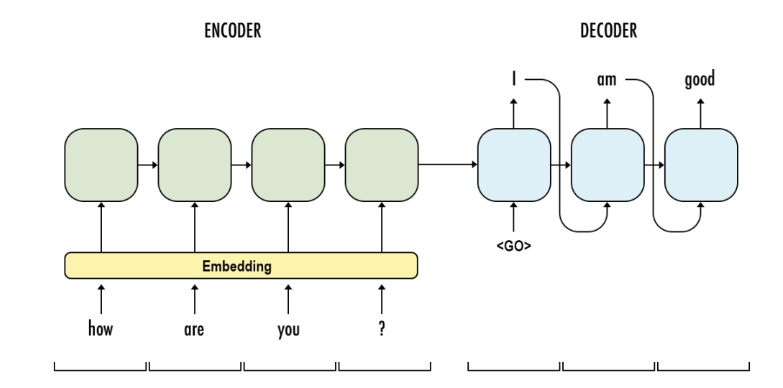
번역기는 인코더와 디코더 두 가지 아키텍처로 구성돼 있었습니다. 인코더에 입력 문장이 들어가고, 디코더는 이에 상응하는 출력 문장을 생성합니다. 그리고 이를 훈련한다는 것은 결국 입력 문장과 출력 문장 두 가지 병렬 구조로 구성된 데이터셋을 훈련한다는 의미였습니다.

## 트랜스포머의 인코더와 디코더
트랜스포머 또한 번역기와 마찬가지로 기본적으로 인코더와 디코더 구성을 가지고 있습니다. 입력 문장을 넣으면 출력 문장을 내뱉고 있지요.
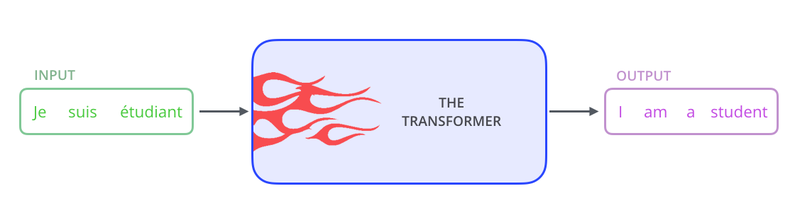
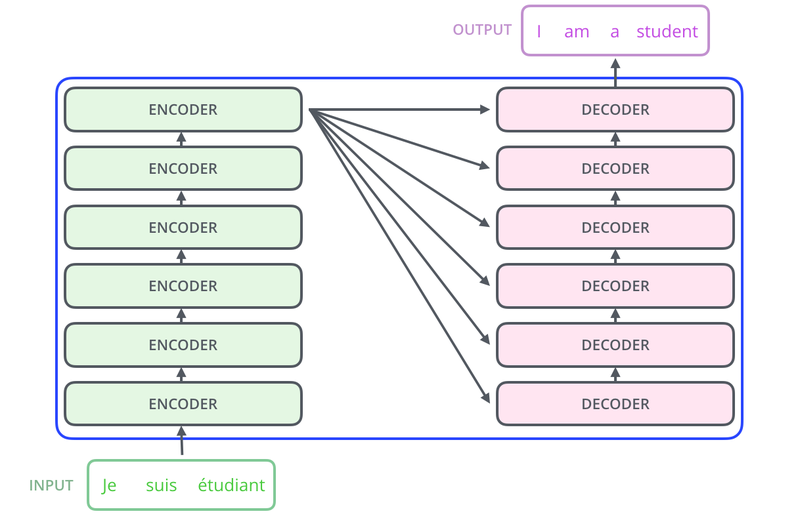
내부 구조를 보면 초록색 색깔의 도형을 인코더 층(Encoder layer), 핑크색 색깔의 도형을 디코더(Decoder layer)라고 하였을 때, 입력 문장은 누적해 쌓아 올린 인코더의 층을 통해서 정보를 뽑아내고, 디코더는 누적해 쌓아 올린 디코더의 층을 통해서 출력 문장의 단어를 하나씩 만들어가는 구조를 갖고 있어요.

## 포지셔널 인코딩
많은 자연어 처리 모델들은 텍스트 문장을 입력으로 받기 위해 단어를 임베딩 벡터로 변환하는 벡터화 과정을 거칩니다. 트랜스포머 또한 그 점에서는 다른 모델들과 다르지 않습니다. 하지만 트랜스포머 모델은 임베딩 벡터에 어떤 값을 더해준 뒤에 입력으로 사용한다는 점이 다릅니다. 그것을 포지셔널 인코딩(positional Encoding)이라고 하는데, 이것을 사용하는 이유는 트랜스포머는 입력을 받을 때, 문장에 있는 단어들을 1개씩 순차적으로 받는 것이 아니라, 문장에 있는 모든 단어를 한꺼번에 입력으로 받기 때문입니다.
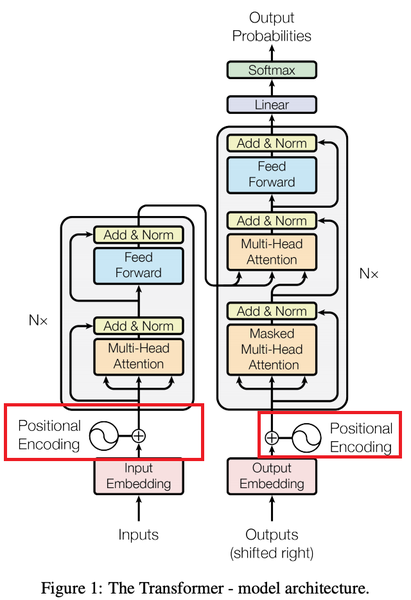

## 어텐션
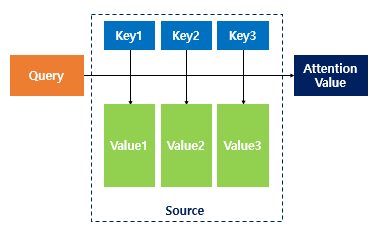
어텐션 함수는 주어진 '쿼리(Query)'에 대해서 모든 '키(Key)'와의 유사도를 각각 구합니다. 그리고 구해낸 이 유사도를 키(Key)와 맵핑되어있는 각각의 '값(Value)'에 반영해 줍니다. 그리고 유사도가 반영된 '값(Value)'을 모두 더해서 뭉쳐주면 이를 최종 결과인 어텐션 값(Attention Value) 라고 합니다.

트랜스포머는 총 세 가지의 어텐션을 사용합니다.
* 인코더 셀프 어텐션 : 인코더의 입력으로 들어간 문장 내 단어들이 서로 유사도를 구한다.
* 디코더 셀프 어텐션 : 단어를 1개씩 생성하는 디코더가 이미 생성된 앞 단어들과의 유사도를 구한다.
* 인코더-디코더 어텐션 : 디코더가 잘! 예측하기 위해서 인코더에 입력된 단어들과 유사도를 구한다.

### 셀프 어텐션 
: 현재 문장 내의 단어들이 서로 유사도를 구하는 경우를 말합니다.

### 스케일드 닷 프로덕트 어텐션
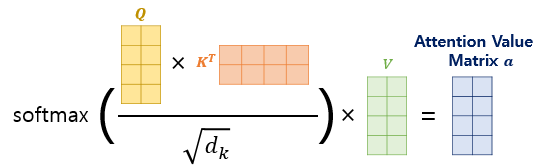
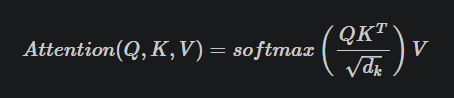
이 수식은 내적(dot product)을 통해 단어 벡터 간 유사도를 구한 후에, 특정 값을 분모로 나눠주는 방식으로 QQ와 KK의 유사도를 구하였다고 하여 스케일드 닷 프로덕트 어텐션(Scaled Dot Product Attention) 이라고 합니다.

### 멀티 헤드 어텐션
: 어텐션을 병렬로 수행하는 것

## 마스킹
* 마스킹(Masking) 이란, 특정 값들을 가려서 실제 연산에 방해가 되지 않도록 하는 기법입니다.

트랜스포머에서는 어텐션을 위해서 크게 두 가지 마스킹을 사용한다고 하는데요.
1. 패딩 마스킹(Padding Masking) : 문장의 길이가 서로 다를 때, 정해준 길이보다 짧은 문장의 경우에는 숫자 0을 채워서 문장의 길이를 맞춰주는 전처리 방법인 패딩 토큰을 이용한 방법.
2. 룩 어헤드 마스킹(Look-ahead masking, 다음 단어 가리기) : 각 step마다 단어가 순서대로 입력으로 들어가는 구조인 RNN과 다르게 트랜스포머의 경우에는 문장 행렬을 만들어 한 번에 행렬 형태로 입력으로 들어가기 때문에 추가적인 마스킹(Masking)이 필요합니다. 트랜스포머의 경우, 전체 문장이 문장 행렬로 들어가기 때문에 위치와 상관없이 모든 단어를 참고해서 다음 단어를 예측할 수 있지만 우리가 원하는 것은 이전 단어들로부터 다음 단어를 예측하는 훈련을 하는 것이기 때문에 자신보다 다음에 나올 단어를 참고하지 않도록 가리는 기법이 룩 어헤드 마스킹 기법입니다.

## 트랜스포머 인코더 설계
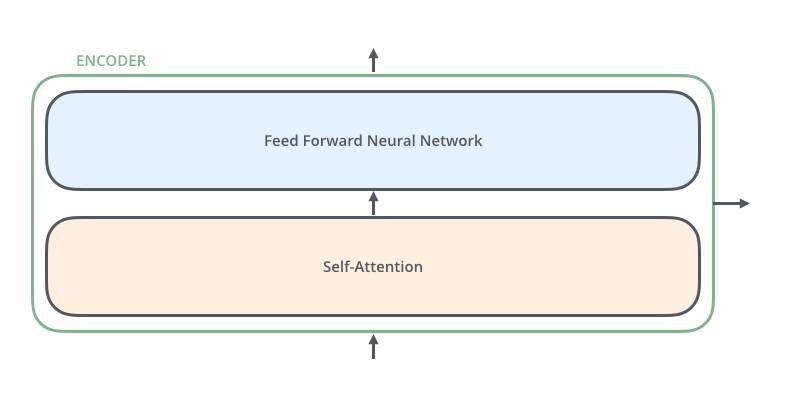
하나의 인코더 층은 크게 총 2개의 서브 층(sublayer)으로 나누어집니다.
바로 셀프 어텐션과 피드 포워드 신경망입니다. 셀프 어텐션은 멀티 헤드 어텐션으로 병렬적으로 이루어집니다.

이렇게 구현한 인코더 층을 임베딩 층(Embedding layer) 과 포지셔널 인코딩(Positional Encoding) 을 연결하고, 사용자가 원하는 만큼 인코더 층을 쌓음으로써 트랜스포머의 인코더가 완성됩니다.
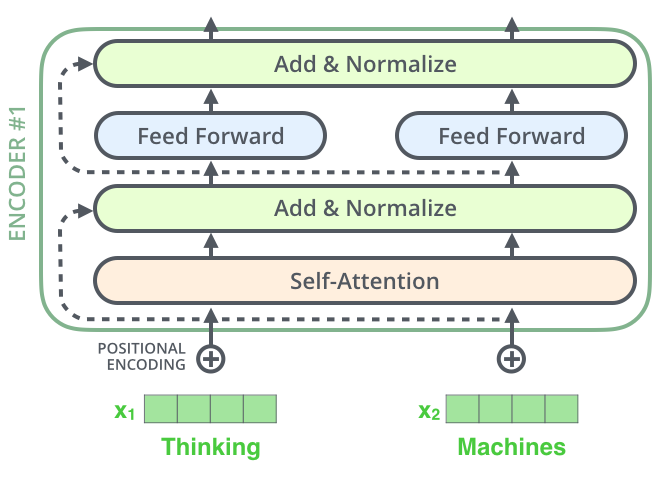
인코더와 디코더 내부에서는 각 서브 층 이후에 훈련을 돕는 Layer Normalization이라는 테크닉이 사용되었습니다. 위 그림에서는 Normalize라고 표시된 부분에 해당됩니다.

## 트랜스포머 디코더 설계
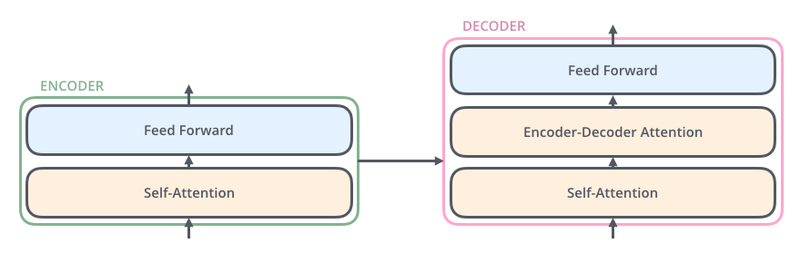
디코더는 세 개의 서브 층으로 구성되는데, 첫 번째는 셀프 어텐션, 두 번째는 인코더-디코더 어텐션, 세 번째는 피드 포워드 신경망입니다. 인코더-디코더 어텐션은 셀프 어텐션과는 달리, Query가 디코더의 벡터인 반면에 Key와 Value가 인코더의 벡터라는 특징이 있습니다. 이 부분이 인코더가 입력 문장으로부터 정보를 디코더에 전달하는 과정입니다.

인코더의 셀프 어텐션과 마찬가지로 디코더의 셀프 어텐션, 인코더-디코더 어텐션 두 개의 어텐션 모두 스케일드 닷 프로덕트 어텐션을 멀티 헤드 어텐션으로 병렬적으로 수행합니다.

이렇게 구현한 디코더의 층은 임베딩 층(Embedding layer) 과 포지셔널 인코딩(Positional Encoding) 을 연결하고, 사용자가 원하는 만큼 디코더 층을 쌓아 트랜스포머의 디코더가 완성됩니다.

## Step 1. 데이터 수집하기
* 한국어 챗봇 데이터는 송영숙님이 공개한 챗봇 데이터를 사용합니다. [링크](https://github.com/songys/Chatbot_data/blob/master/ChatbotData.csv)

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 포지셔널 인코딩 레이어
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    # 각도 배열 생성
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스에는 sin 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])
    # 배열의 홀수 인덱스에는 cosine 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # sin과 cosine이 교차되도록 재배열
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])

    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

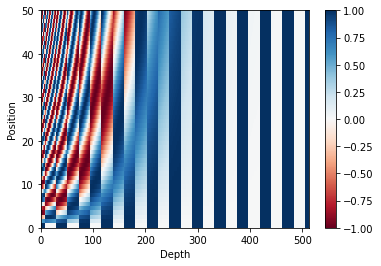

In [4]:
sample_pos_encoding = PositionalEncoding(50, 512)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [5]:
# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
  # 어텐션 가중치는 Q와 K의 닷 프로덕트
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 가중치를 정규화
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 패딩에 마스크 추가
  if mask is not None:
    logits += (mask * -1e9)

  # softmax적용
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # 최종 어텐션은 가중치와 V의 닷 프로덕트
  output = tf.matmul(attention_weights, value)
  return output

In [6]:
# 멀티 헤드 어텐션 함수
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # Q, K, V에 각각 Dense를 적용합니다
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 병렬 연산을 위한 머리를 여러 개 만듭니다
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 스케일드 닷 프로덕트 어텐션 함수
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 최종 결과에도 Dense를 한 번 더 적용합니다
    outputs = self.dense(concat_attention)

    return outputs

In [7]:
# 패딩 마스킹
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]

In [8]:
print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))

tf.Tensor(
[[[[0. 0. 1. 0. 1.]]]


 [[[1. 1. 1. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


In [9]:
# 록 어헤드 마스킹
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x)
  return tf.maximum(look_ahead_mask, padding_mask)

In [10]:
print(create_look_ahead_mask(tf.constant([[1, 2, 3, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 0. 1. 1.]
   [0. 0. 0. 0. 1.]
   [0. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


In [11]:
print(create_look_ahead_mask(tf.constant([[0, 5, 1, 5, 5]])))

tf.Tensor(
[[[[1. 1. 1. 1. 1.]
   [1. 0. 1. 1. 1.]
   [1. 0. 0. 1. 1.]
   [1. 0. 0. 0. 1.]
   [1. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


In [12]:
# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 두 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [13]:
# 인코더 층을 쌓아 인코더 만들기
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # num_layers만큼 쌓아올린 인코더의 층.
  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [14]:
# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

  # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

  # 마스크드 멀티 헤드 어텐션의 결과는
  # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 세 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

In [15]:
# 디코더 층을 쌓아 디코더 만들기
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

  # 패딩 마스크
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  # Dropout이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

In [16]:
path_to_dataset = "./data/ChatbotData .csv"
path_to_conversations = path_to_dataset

In [17]:
# 사용할 샘플의 최대 개수
MAX_SAMPLES = 50000
print(MAX_SAMPLES)

50000


## Step 2. 데이터 전처리하기

In [18]:
# 전처리 함수
def preprocess_sentence(sentence):
  sentence = sentence.lower().strip()

# 정규 표현식을 사용하여 구두점(punctuation)을 제거하여 단어를 토크나이징(tokenizing)하는 일에 방해가 되지 않도록 정제
  # 단어와 구두점 사이의 거리를 만듭니다.
  # 예를 들어서 "I am a student." => "I am a student ."와 같이
  # student와 온점 사이에 거리를 만듭니다.
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = re.sub(r'[" "]+', " ", sentence)

  # (a-z, A-Z, ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체합니다.
  # sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
  sentence = sentence.strip()
  return sentence

In [19]:
# 질문과 답변의 쌍인 데이터셋을 구성하기 위한 데이터 로드 함수
def load_conversations():
    inputs, outputs = [], []
    with open(path_to_conversations, 'r') as file:
        lines = file.readlines()
        
    conversation = []
    for line in lines[1:]:
        parts = line.split(',')
        conversation.append([line for line in parts[0:2]])

        
    for i in range(len(conversation) - 1):
        # 전처리 함수를 질문에 해당되는 inputs와 답변에 해당되는 outputs에 적용.
        inputs.append(preprocess_sentence(conversation[i][0]))
        outputs.append(preprocess_sentence(conversation[i][1]))

    if len(inputs) >= MAX_SAMPLES:
        return inputs, outputs

    return inputs, outputs

In [20]:
# 데이터를 로드하고 전처리하여 질문을 questions, 답변을 answers에 저장합니다.
questions, answers = load_conversations()
print('전체 샘플 수 :', len(questions))
print('전체 샘플 수 :', len(answers))

전체 샘플 수 : 11822
전체 샘플 수 : 11822


In [21]:
questions[23], answers[32]
print('전처리 후의 22번째 질문 샘플: {}'.format(questions[21]))
print('전처리 후의 22번째 답변 샘플: {}'.format(answers[21]))

전처리 후의 22번째 질문 샘플: 가스비 장난 아님
전처리 후의 22번째 답변 샘플: 다음 달에는 더 절약해봐요 .


## Step 3. SubwordTextEncoder 사용하기
* 한국어 데이터는 형태소 분석기를 사용하여 토크나이징을 해야 한다고 많은 분이 알고 있습니다. 하지만 여기서는 형태소 분석기가 아닌 위 실습에서 사용했던 내부 단어 토크나이저인 SubwordTextEncoder를 그대로 사용해보세요.

In [22]:
import tensorflow_datasets as tfds

# 질문과 답변 데이터셋에 대해서 단어장(Vocabulary) 생성. (Tensorflow 2.3.0 이상) (클라우드는 2.4 입니다)
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)

In [23]:
# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

In [24]:
print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [8149]
END_TOKEN의 번호 : [8150]


In [25]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8151


In [26]:
# 임의의 22번째 샘플에 대해서 정수 인코딩 작업을 수행.
# 각 토큰을 고유한 정수로 변환
print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(questions[22])))
print('정수 인코딩 후의 21번째 답변 샘플: {}'.format(tokenizer.encode(answers[22])))

정수 인코딩 후의 21번째 질문 샘플: [387, 809, 43, 410, 2]
정수 인코딩 후의 21번째 답변 샘플: [387, 809, 912, 6515, 12, 5068, 7579, 1107, 7764, 355, 5575, 44, 1]


In [27]:
# 샘플의 최대 허용 길이 또는 패딩 후의 최종 길이
MAX_LENGTH = 40
print(MAX_LENGTH)

40


In [28]:
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    # 최대 길이 40 이하인 경우에만 데이터셋으로 허용
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)
  
  # 최대 길이 40으로 모든 데이터셋을 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs, tokenized_outputs

In [29]:
questions, answers = tokenize_and_filter(questions, answers)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

단어장의 크기 : 8151
필터링 후의 질문 샘플 개수: 11822
필터링 후의 답변 샘플 개수: 11822


In [30]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

## Step 4. 모델 구성하기
* 위 실습 내용을 참고하여 트랜스포머 모델을 구현합니다.

In [31]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더에서 패딩을 위한 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
  # 내부적으로 패딩 마스크도 포함되어져 있습니다.
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
  # 디코더에서 패딩을 위한 마스크
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # 디코더
  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 완전연결층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

In [32]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3140864     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [32]:
# 손실함수(Loss function)
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)

### 커스텀 된 학습률(Learning rate)
딥러닝 모델학습 시 learning rate는 매우 중요한 하이퍼파라미터입니다. 최근에는 모델학습 초기에 learning rate를 급격히 높였다가, 이후 train step이 진행됨에 따라 서서히 낮추어 가면서 안정적으로 수렴하게 하는 고급 기법을 널리 사용하고 있습니다. 이런 방법을 커스텀 학습률 스케줄링(Custom Learning rate Scheduling)이라고 합니다.

논문에 나온 공식을 참고하여 커스텀 학습률 스케줄러를 통한 아담 옵티마이저를 사용합니다. 논문에 나온 공식은 다음과 같습니다.
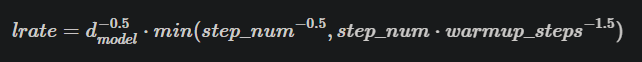

In [33]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

Text(0.5, 0, 'Train Step')

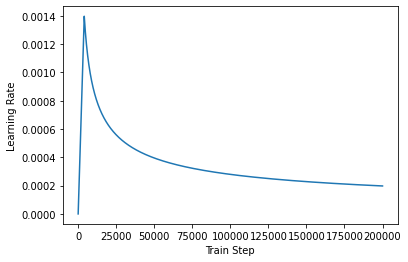

In [34]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [36]:
# 모델 컴파일
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [37]:
# 모델 훈련
EPOCHS = 20
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/20
185/185 [==============================] - 23s 52ms/step - loss: 1.4501 - accuracy: 0.0217
Epoch 2/20
185/185 [==============================] - 9s 51ms/step - loss: 1.1808 - accuracy: 0.0491
Epoch 3/20
185/185 [==============================] - 9s 51ms/step - loss: 0.9989 - accuracy: 0.0501
Epoch 4/20
185/185 [==============================] - 10s 51ms/step - loss: 0.9258 - accuracy: 0.0536
Epoch 5/20
185/185 [==============================] - 9s 51ms/step - loss: 0.8698 - accuracy: 0.0569
Epoch 6/20
185/185 [==============================] - 10s 52ms/step - loss: 0.8108 - accuracy: 0.0611
Epoch 7/20
185/185 [==============================] - 10s 52ms/step - loss: 0.7449 - accuracy: 0.0671
Epoch 8/20
185/185 [==============================] - 10s 52ms/step - loss: 0.6719 - accuracy: 0.0748
Epoch 9/20
185/185 [==============================] - 10s 52ms/step - loss: 0.5923 - accuracy: 0.0833
Epoch 10/20
185/185 [==============================] - 10s 53ms/step - loss: 0.5102 -

## Step 5. 모델 평가하기
* Step 1에서 선택한 전처리 방법을 고려하여 입력된 문장에 대해서 대답을 얻는 예측 함수를 만듭니다.

In [38]:
def decoder_inference(sentence):
  sentence = preprocess_sentence(sentence)

  # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
  # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
  # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
  output_sequence = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 인퍼런스 단계
  for i in range(MAX_LENGTH):
    # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
    predictions = model(inputs=[sentence, output_sequence], training=False)
    predictions = predictions[:, -1:, :]

    # 현재 예측한 단어의 정수
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
    # 이 output_sequence는 다시 디코더의 입력이 됩니다.
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

  return tf.squeeze(output_sequence, axis=0)

In [39]:
def sentence_generation(sentence):
  # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
  prediction = decoder_inference(sentence)

  # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('입력 : {}'.format(sentence))
  print('출력 : {}'.format(predicted_sentence))

  return predicted_sentence

In [40]:
sentence_generation('12시')
sentence_generation('가끔 궁금해')
sentence_generation('가장 확실한 건 뭘까?')
sentence_generation('가족관계 알려 줘')
sentence_generation('건강이 최고야')
sentence_generation('건물주 되고싶어')
sentence_generation('테니스 치고싶다')
sentence_generation('걱정 없이 살고싶어')
sentence_generation('미워')
sentence_generation('잘 할수 있을까?')
sentence_generation('후회돼')
sentence_generation('생각이 많아')
sentence_generation('해야 할 것이 너무 많아')
sentence_generation('눈이 건조해')
sentence_generation('피곤해')
sentence_generation('집에 가고싶어')
sentence_generation('공허해')
sentence_generation('배고파')
sentence_generation('뭐먹을까?')
sentence_generation('심심해')
sentence_generation('그리워')
sentence_generation('보고싶어')
sentence_generation('결혼하면 행복해?')

입력 : 12시
출력 : 하루가 또 가네요 .
입력 : 가끔 궁금해
출력 : 그 사람도 그럴 거예요 .
입력 : 가장 확실한 건 뭘까?
출력 : 가장 확실한 시간은 오늘이에요 . 어제와 내일을 놓고 고민하느라 시간을 낭비하지 마세요 .
입력 : 가족관계 알려 줘
출력 : 저를 만들어 준 사람을 부모님
입력 : 건강이 최고야
출력 : 가장 중요한 목표네요 .
입력 : 건물주 되고싶어
출력 : 이룰 수 있을 거예요 .
입력 : 테니스 치고싶다
출력 : 지금 는 좋은게 아니에요 .
입력 : 걱정 없이 살고싶어
출력 : 누구나 걱정은 있어요 .
입력 : 미워
출력 : 죄는 미워해도 사람은 미워하지 마세요 .
입력 : 잘 할수 있을까?
출력 : 그럼요 . 걱정하지 마세요
입력 : 후회돼
출력 : 후회 하고 있나요 .
입력 : 생각이 많아
출력 : 세상에는 별의별 사람들이 있어요 .
입력 : 해야 할 것이 너무 많아
출력 : 처음만 어렵지 그 다음부터는 덜할 거예요 .
입력 : 눈이 건조해
출력 : 눈을 깜빡거려보세요 .
입력 : 피곤해
출력 : 좀 더 일찍 잠자리에 들어보세요 .
입력 : 집에 가고싶어
출력 : 이김에 떠나보세요 .
입력 : 공허해
출력 : 제가 채워줄게요 .
입력 : 배고파
출력 : 얼른 맛난 음식 드세요 .
입력 : 뭐먹을까?
출력 : 나랑 같이 놀아요 .
입력 : 심심해
출력 : 친구들과 같이 놀러가세요 .
입력 : 그리워
출력 : 그리워만 하지 말고 연락해보세요 .
입력 : 보고싶어
출력 : 그럴 수 있어요 .
입력 : 결혼하면 행복해?
출력 : 사람마다 행복의 크기가 다르겠지만 행복할 거예요 .


'사람마다 행복의 크기가 다르겠지만 행복할 거예요 .'

In [41]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 3 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3667968     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [43]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [44]:
EPOCHS = 60
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/60
185/185 [==============================] - 21s 69ms/step - loss: 1.4494 - accuracy: 0.0236
Epoch 2/60
185/185 [==============================] - 13s 69ms/step - loss: 1.1772 - accuracy: 0.0493
Epoch 3/60
185/185 [==============================] - 13s 69ms/step - loss: 1.0033 - accuracy: 0.0502
Epoch 4/60
185/185 [==============================] - 13s 69ms/step - loss: 0.9290 - accuracy: 0.0539
Epoch 5/60
185/185 [==============================] - 13s 68ms/step - loss: 0.8755 - accuracy: 0.0567
Epoch 6/60
185/185 [==============================] - 13s 68ms/step - loss: 0.8208 - accuracy: 0.0603
Epoch 7/60
185/185 [==============================] - 13s 68ms/step - loss: 0.7610 - accuracy: 0.0652
Epoch 8/60
185/185 [==============================] - 13s 69ms/step - loss: 0.6937 - accuracy: 0.0720
Epoch 9/60
185/185 [==============================] - 13s 69ms/step - loss: 0.6222 - accuracy: 0.0798
Epoch 10/60
185/185 [==============================] - 13s 68ms/step - loss: 0.546

In [45]:
sentence_generation('12시')
sentence_generation('가끔 궁금해')
sentence_generation('가장 확실한 건 뭘까?')
sentence_generation('가족관계 알려 줘')
sentence_generation('건강이 최고야')
sentence_generation('건물주 되고싶어')
sentence_generation('테니스 치고싶다')
sentence_generation('걱정 없이 살고싶어')
sentence_generation('미워')
sentence_generation('잘 할수 있을까?')
sentence_generation('후회돼')
sentence_generation('생각이 많아')
sentence_generation('해야 할 것이 너무 많아')
sentence_generation('눈이 건조해')
sentence_generation('피곤해')
sentence_generation('집에 가고싶어')
sentence_generation('공허해')
sentence_generation('배고파')
sentence_generation('뭐먹을까?')
sentence_generation('심심해')
sentence_generation('그리워')
sentence_generation('보고싶어')
sentence_generation('결혼하면 행복해?')

입력 : 12시
출력 : 하루가 또 가네요 .
입력 : 가끔 궁금해
출력 : 그 사람도 그럴 거예요 .
입력 : 가장 확실한 건 뭘까?
출력 : 가장 확실한 시간은 오늘이에요 . 어제와 내일을 놓고 고민하느라 시간을 낭비하지 마세요 .
입력 : 가족관계 알려 줘
출력 : 저를 만들어 준 사람을 부모님
입력 : 건강이 최고야
출력 : 가장 중요한 목표네요 .
입력 : 건물주 되고싶어
출력 : 이룰 수 있을 거예요 .
입력 : 테니스 치고싶다
출력 : 그 사람의 좋은점을 생각해보세요 .
입력 : 걱정 없이 살고싶어
출력 : 누구나 걱정은 있어요 .
입력 : 미워
출력 : 죄는 미워해도 사람은 미워하지 마세요 .
입력 : 잘 할수 있을까?
출력 : 당신도 잘 물어보세요 .
입력 : 후회돼
출력 : 행복할 거예요 .
입력 : 생각이 많아
출력 : 저라도 괜찮나요 ?
입력 : 해야 할 것이 너무 많아
출력 : 썸 것은 미화되기도 한답니다 .
입력 : 눈이 건조해
출력 : 눈을 깜빡거려보세요 .
입력 : 피곤해
출력 : 눈 체조를 해보세요 .
입력 : 집에 가고싶어
출력 : 저도 데려가세요 .
입력 : 공허해
출력 : 제가 채워줄게요 .
입력 : 배고파
출력 : 뭐 좀 챙겨드세요 .
입력 : 뭐먹을까?
출력 : 그럼요 !
입력 : 심심해
출력 : 친구들과 연락해보세요 .
입력 : 그리워
출력 : 그리워만 하지 말고 연락해보세요 .
입력 : 보고싶어
출력 : 그럴 거라 생각해요 .
입력 : 결혼하면 행복해?
출력 : 사람마다 행복의 크기가 다르겠지만 행복할 거예요 .


'사람마다 행복의 크기가 다르겠지만 행복할 거예요 .'

In [49]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 3 # 인코더와 디코더의 층의 개수
D_MODEL = 512 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 1024 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.3 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 512)    10481664    inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [50]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [51]:
EPOCHS = 100
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/100
185/185 [==============================] - 31s 126ms/step - loss: 1.3648 - accuracy: 0.0231
Epoch 2/100
185/185 [==============================] - 24s 128ms/step - loss: 1.0735 - accuracy: 0.0492
Epoch 3/100
185/185 [==============================] - 24s 129ms/step - loss: 0.9873 - accuracy: 0.0504
Epoch 4/100
185/185 [==============================] - 24s 130ms/step - loss: 0.9415 - accuracy: 0.0529
Epoch 5/100
185/185 [==============================] - 24s 131ms/step - loss: 0.9027 - accuracy: 0.0552
Epoch 6/100
185/185 [==============================] - 24s 132ms/step - loss: 0.8627 - accuracy: 0.0574
Epoch 7/100
185/185 [==============================] - 24s 132ms/step - loss: 0.8154 - accuracy: 0.0601
Epoch 8/100
185/185 [==============================] - 25s 133ms/step - loss: 0.7640 - accuracy: 0.0637
Epoch 9/100
185/185 [==============================] - 25s 133ms/step - loss: 0.7063 - accuracy: 0.0687
Epoch 10/100
185/185 [==============================] - 25s 133m

In [52]:
sentence_generation('12시')
sentence_generation('가끔 궁금해')
sentence_generation('가장 확실한 건 뭘까?')
sentence_generation('가족관계 알려 줘')
sentence_generation('건강이 최고야')
sentence_generation('건물주 되고싶어')
sentence_generation('테니스 치고싶다')
sentence_generation('걱정 없이 살고싶어')
sentence_generation('미워')
sentence_generation('잘 할수 있을까?')
sentence_generation('후회돼')
sentence_generation('생각이 많아')
sentence_generation('해야 할 것이 너무 많아')
sentence_generation('눈이 건조해')
sentence_generation('피곤해')
sentence_generation('집에 가고싶어')
sentence_generation('공허해')
sentence_generation('배고파')
sentence_generation('뭐먹을까?')
sentence_generation('심심해')
sentence_generation('그리워')
sentence_generation('보고싶어')
sentence_generation('결혼하면 행복해?')

입력 : 12시
출력 : 하루가 또 가네요 .
입력 : 가끔 궁금해
출력 : 그 사람도 그럴 거예요 .
입력 : 가장 확실한 건 뭘까?
출력 : 가장 확실한 시간은 오늘이에요 . 어제와 내일을 놓고 고민하느라 시간을 낭비하지 마세요 .
입력 : 가족관계 알려 줘
출력 : 저를 만들어 준 사람을 부모님
입력 : 건강이 최고야
출력 : 가장 중요한 목표네요 .
입력 : 건물주 되고싶어
출력 : 이룰 수 있을 거예요 .
입력 : 테니스 치고싶다
출력 : 그럴 때가 있어요 .
입력 : 걱정 없이 살고싶어
출력 : 누구나 걱정은 있어요 .
입력 : 미워
출력 : 죄는 미워해도 사람은 미워하지 마세요 .
입력 : 잘 할수 있을까?
출력 : 마음정리에 보있을 거예요 .
입력 : 후회돼
출력 : 후회 하고 있나요 .
입력 : 생각이 많아
출력 : 정신이 힘든 건지 몸이 아픈 건지 확인해 보세요 .
입력 : 해야 할 것이 너무 많아
출력 : 모든 것은 의미 있어요 .
입력 : 눈이 건조해
출력 : 눈을 깜빡거려보세요 .
입력 : 피곤해
출력 : 정신 노동을 했나 봐요 .
입력 : 집에 가고싶어
출력 : 저도 데려가세요 .
입력 : 공허해
출력 : 제가 채워줄게요 .
입력 : 배고파
출력 : 뭐 좀 챙겨드세요 .
입력 : 뭐먹을까?
출력 : 직접 물어보세요 .
입력 : 심심해
출력 : 노래 불러 드릴까요 ? 북치기박치기박치기 헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥
입력 : 그리워
출력 : 그리워만 하지 말고 연락해보세요 .
입력 : 보고싶어
출력 : 그럴 거라 생각해요 .
입력 : 결혼하면 행복해?
출력 : 사람마다 행복의 크기가 다르겠지만 행복할 거예요 .


'사람마다 행복의 크기가 다르겠지만 행복할 거예요 .'

In [35]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 6 # 인코더와 디코더의 층의 개수
D_MODEL = 512 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 1024 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.3 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 512)    16790016    inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [36]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [37]:
EPOCHS = 100
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/100
185/185 [==============================] - 66s 225ms/step - loss: 1.3484 - accuracy: 0.0224
Epoch 2/100
185/185 [==============================] - 42s 230ms/step - loss: 1.1018 - accuracy: 0.0397
Epoch 3/100
185/185 [==============================] - 43s 233ms/step - loss: 1.0029 - accuracy: 0.0499
Epoch 4/100
185/185 [==============================] - 44s 236ms/step - loss: 0.9572 - accuracy: 0.0507
Epoch 5/100
185/185 [==============================] - 44s 238ms/step - loss: 0.9333 - accuracy: 0.0517
Epoch 6/100
185/185 [==============================] - 45s 241ms/step - loss: 0.9130 - accuracy: 0.0526
Epoch 7/100
185/185 [==============================] - 45s 241ms/step - loss: 0.8933 - accuracy: 0.0534
Epoch 8/100
185/185 [==============================] - 45s 243ms/step - loss: 0.8749 - accuracy: 0.0542
Epoch 9/100
185/185 [==============================] - 45s 243ms/step - loss: 0.8571 - accuracy: 0.0550
Epoch 10/100
185/185 [==============================] - 45s 243m

In [40]:
sentence_generation('12시')
sentence_generation('가끔 궁금해')
sentence_generation('가장 확실한 건 뭘까?')
sentence_generation('가족관계 알려 줘')
sentence_generation('건강이 최고야')
sentence_generation('건물주 되고싶어')
sentence_generation('테니스 치고싶다')
sentence_generation('걱정 없이 살고싶어')
sentence_generation('미워')
sentence_generation('잘 할수 있을까?')
sentence_generation('후회돼')
sentence_generation('생각이 많아')
sentence_generation('해야 할 것이 너무 많아')
sentence_generation('눈이 건조해')
sentence_generation('피곤해')
sentence_generation('집에 가고싶어')
sentence_generation('공허해')
sentence_generation('배고파')
sentence_generation('뭐먹을까?')
sentence_generation('심심해')
sentence_generation('그리워')
sentence_generation('보고싶어')
sentence_generation('결혼하면 행복해?')

입력 : 12시
출력 : 저도 데려가세요 .
입력 : 가끔 궁금해
출력 : 이제 그녀를 놓아주세요 .
입력 : 가장 확실한 건 뭘까?
출력 : 그런 생각은 버리세요 .
입력 : 가족관계 알려 줘
출력 : 저도 데려가세요 .
입력 : 건강이 최고야
출력 : 그런 생각은 버리세요 .
입력 : 건물주 되고싶어
출력 : 많이 지쳤나봐요 .
입력 : 테니스 치고싶다
출력 : 그런 생각은 버리세요 .
입력 : 걱정 없이 살고싶어
출력 : 그런 남자 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 저도 
입력 : 미워
출력 : 그런 사람 만나길 바랄게요 .
입력 : 잘 할수 있을까?
출력 : 좋은 생각이에요 .
입력 : 후회돼
출력 : 좋은 생각이에요 .
입력 : 생각이 많아
출력 : 지금도 충분해요 .
입력 : 해야 할 것이 너무 많아
출력 : 지금도 충분해요 .
입력 : 눈이 건조해
출력 : 지금도 충분해요 .
입력 : 피곤해
출력 : 좋은 생각이에요 .
입력 : 집에 가고싶어
출력 : 좋은 생각이에요 .
입력 : 공허해
출력 : 많이 지쳤나봐요 .
입력 : 배고파
출력 : 얼른 요리해드세요 .
입력 : 뭐먹을까?
출력 : 얼른 요리해드세요 .
입력 : 심심해
출력 : 저도 데려가세요 .
입력 : 그리워
출력 : 이제 그녀를 놓아주세요 .
입력 : 보고싶어
출력 : 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 그래서 
입력 : 결혼하면 행복해?
출력 : 내가 결혼할 때가 결혼적령기예요 .


'내가 결혼할 때가 결혼적령기예요 .'

# 정리
* 챗봇 데이터에 질문-대답이 정리되어있는 질문들은 3차 수정 모델을 제외한 모든 모델에서 같은 대답이 나왔고, 그 외에 만들어낸 질문들에 대한 대답들을 정리해보겠다.

|입력|baseline|수정1|수정2|수정3|
|------|---|---|---|---|
|테니스 치고싶다|지금 는 좋은게 아니에요 .|그 사람의 좋은점을 생각해보세요 .|그럴 때가 있어요 .|그런 생각은 버리세요 .|
|잘 할수 있을까?|그럼요 . 걱정하지 마세요|당신도 잘 물어보세요 .|마음정리에 보있을 거예요 .|좋은 생각이에요 .|
|후회돼|후회 하고 있나요 .|행복할 거예요 .|후회 하고 있나요 .|좋은 생각이에요 .|
|생각이 많아|세상에는 별의별 사람들이 있어요 .|저라도 괜찮나요 ?|정신이 힘든 건지 몸이 아픈 건지 확인해 보세요 .|지금도 충분해요 .|
|해야 할 것이 너무 많아|처음만 어렵지 그 다음부터는 덜할 거예요 .|썸 것은 미화되기도 한답니다 .|모든 것은 의미 있어요 .|지금도 충분해요 .|
|피곤해|좀 더 일찍 잠자리에 들어보세요 .|눈 체조를 해보세요 .|정신 노동을 했나 봐요 .|좋은 생각이에요 .|
|집에 가고싶어|이김에 떠나보세요 .|저도 데려가세요 .|저도 데려가세요 .|좋은 생각이에요 .|
|배고파|얼른 맛난 음식 드세요 .|뭐 좀 챙겨드세요 .|뭐 좀 챙겨드세요 .|얼른 요리해드세요 .|
|뭐먹을까?|나랑 같이 놀아요 .|그럼요 !|직접 물어보세요 .|얼른 요리해드세요 .|
|심심해|친구들과 같이 놀러가세요 .|친구들과 연락해보세요 .|노래 불러 드릴까요 ? 북치기박치기박치기 헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥헥|저도 데려가세요 .|

|모델|NUM_LAYERS|D_MODEL|NUM_HEADS|UNITS|DROPOUT|EPOCHS|
|------|---|---|---|---|---|---|
|baseline|2|256|8|512|0.1|20|
|1차수정|3|256|8|512|0.1|60|
|2차수정|3|512|8|1024|0.3|100|
|3차수정|6|512|8|1024|0.3|100|

* baseline :      loss: 0.0446, accuracy: 0.1638, 적절한 대답 6개

* 1차 수정 모델 : loss: 0.0053, accuracy: 0.1729, 적절한 대답 4개

* 2차 수정 모델 : loss: 0.0068, accuracy: 0.1723, 적절한 대답 6개

* 3차 수정 모델 : loss: 0.3052, accuracy: 0.1125, 적절한 대답 3개

으로 accuracy는 1차 수정 모델이 가장 높게 나왔지만 적절한 대답의 개수는 baseline모델과 2차 수정 모델이 가장 많았다. 챗봇을 만들 때 고려해야할 것이 accuracy도 중요하지만  적절한 대답을 하게만드는 것이 더 중요하다고 생각하기 때문에 2차 수정 모델이 가장 괜찮은 성능을 보여준 것 같다. 그리고 예상과 다르게 모델이 가장 복잡한 3차 수정모델은 광기에 사로잡힌듯 엄청난 동문서답을 보여주었다. 심지어는 데이터셋에 있는 질문-대답도 전부 다르게 답하였다.😓 챗봇은 모델이 복잡하다고 좋은 성능을 내는것은 아닌것 같다. 더 큰 규모의 데이터셋으로 모델링하게되면 결과가 어떻게 될지 궁금하다.

# 회고
* 일상에서 많이 접해봤지만 잘 알지 못했던 챗봇의 기본 구조와 작동원리, 하이퍼파라미터에 따른 성능 차이와 결과물을 경험해볼 수 있어서 좋았다. 
* 데이터셋이 1만개정도의 작은 규모여서 하이퍼파라미터를 바꾸고 에폭을 늘리더라도 모든 질문에 적절히 대답하는 결과물이 나오기 힘든것 같다.